# INTRODUCTION

| ID       | Fullname            |
|----------|---------------------|
| 19127399 | Huỳnh Cao Nhật Hiếu |
| 19127444 | Ngô Đăng Khoa       | 

# LIBRARY

In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Add addition library


# PREPROCESSING DATA

## *Read Data*

In [242]:
# Load Data that I will investigate it
df_match = pd.read_csv('Match.csv')
df_player_attribute = pd.read_csv('Player_Attributes.csv')
df_team_attribute = pd.read_csv('Team_Attributes.csv')
df_team = pd.read_csv('Team.csv')
df_player = pd.read_csv('Player.csv')
df_country = pd.read_csv('Country.csv')
df_league = pd.read_csv('League.csv')

## *Preprocessing*

In [262]:
match_features = ['id', 'country_id','league_id', 'season', 'date', 'match_api_id', 
                    'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']
df_match = df_match[match_features]
df_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [265]:
df_man_match = df_match[df_match['home_team_api_id'] == (df_team[df_team['team_long_name'] =='Manchester United']['team_api_id'].values[0])]

In [264]:
df_player_attribute[df_player_attribute['id']==1995]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
1994,1995,184433,12245,2015-07-03 00:00:00,65.0,65.0,left,medium,medium,43.0,...,41.0,55.0,25.0,25.0,25.0,8.0,15.0,7.0,14.0,14.0


# GIVE THE QUESTION

## *1. Trận đấu ở sân nhà/sân khách có ảnh hưởng đến kết quả trận đấu và số lượng bàn thắng của mỗi đội hay không?*

In [251]:
match_features = ['id', 'country_id','league_id', 'season', 'date', 'match_api_id', 
                    'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']
df_match = df_match[match_features]
df_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [252]:
new_col = []
for i in range(0,len(df_match)):
    if df_match['home_team_goal'][i] > df_match['away_team_goal'][i]:
        new_col.append('win')
    elif df_match['home_team_goal'][i] < df_match['away_team_goal'][i]:
        new_col.append('lose')
    else:
        new_col.append('draw')
        
data = {'result':new_col}
temp = pd.DataFrame(data)
df_match = pd.concat([df_match,temp],axis=1)
df_match


,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,draw
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,draw
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,lose
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,win
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,lose
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,win
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,lose
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,win
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,draw


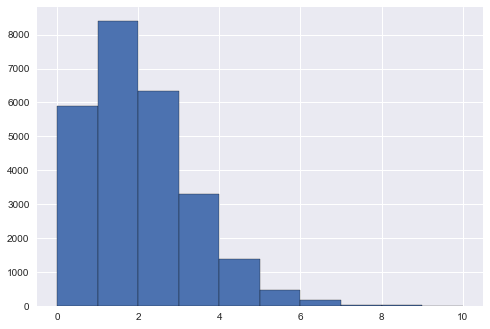

In [253]:
plt.hist(df_match['home_team_goal'], range(0,11), edgecolor='black');

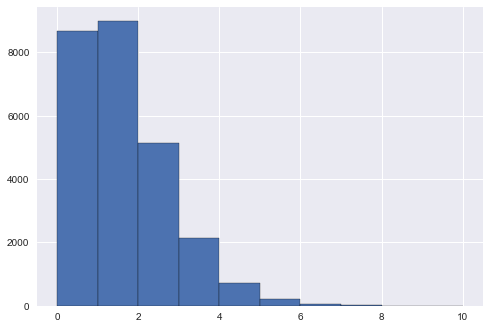

In [254]:
plt.hist(df_match['away_team_goal'], range(0,11), edgecolor='black');

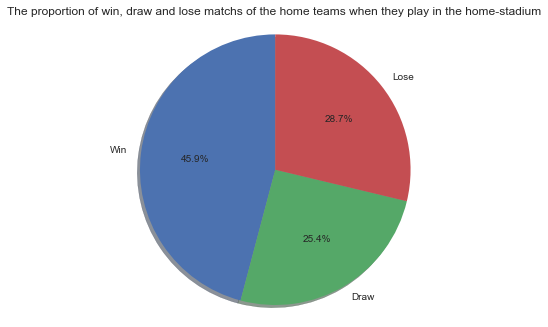

In [255]:
#Count the number of win, draw and lose match of home team
num_win, num_draw, num_lose = \
                len(df_match[df_match['result'] == 'win']), \
                len(df_match[df_match['result'] == 'draw']), \
                len(df_match[df_match['result'] == 'lose'])

#Draw pie chart illustrates the proportion of win, draw and lose match when home team plays in home-stadium.
labels = ['Win','Draw','Lose']
sizes = [num_win/len(df_man_match), num_draw/len(df_man_match), num_lose/len(df_man_match)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.title('The proportion of win, draw and lose matchs of the home teams when they play in the home-stadium');

In [256]:
df_man_match = df_match[df_match['home_team_api_id'] == (df_team[df_team['team_long_name'] =='Manchester United']['team_api_id'].values[0])]
df_man_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
1728,1729,1729,1729,2008/2009,2008-08-17 00:00:00,489042,10260,10261,1,1,draw
1738,1739,1729,1729,2008/2009,2008-10-29 00:00:00,489132,10260,8654,2,0,win
1748,1749,1729,1729,2008/2009,2008-11-01 00:00:00,489142,10260,8667,4,3,win
1768,1769,1729,1729,2008/2009,2008-11-15 00:00:00,489162,10260,10194,5,0,win
1798,1799,1729,1729,2008/2009,2008-12-06 00:00:00,489192,10260,8472,1,0,win
...,...,...,...,...,...,...,...,...,...,...,...
4663,4664,1729,1729,2015/2016,2016-04-16 00:00:00,1989045,10260,10252,1,0,win
4681,4682,1729,1729,2015/2016,2016-05-01 00:00:00,1989063,10260,8197,1,1,draw
4701,4702,1729,1729,2015/2016,2016-05-17 00:00:00,1987600,10260,8678,3,1,win
4722,4723,1729,1729,2015/2016,2015-09-12 00:00:00,1988754,10260,8650,3,1,win


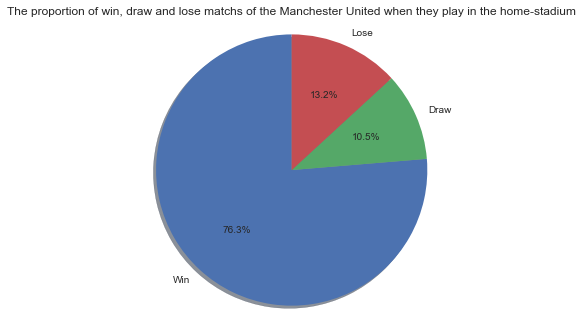

In [257]:
#Count the number of win, draw and lose match of home team
num_win, num_draw, num_lose = \
                len(df_man_match[df_man_match['result'] == 'win']), \
                len(df_man_match[df_man_match['result'] == 'draw']), \
                len(df_man_match[df_man_match['result'] == 'lose'])

#Draw pie chart illustrates the proportion of win, draw and lose match when home team plays in home-stadium.
labels = ['Win','Draw','Lose']
sizes = [num_win/len(df_man_match), num_draw/len(df_man_match), num_lose/len(df_man_match)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('The proportion of win, draw and lose matchs of the Manchester United when they play in the home-stadium');               

In [258]:
x = df_match[df_match['result'] == 'win']
x

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,win
8,9,1,1,2008/2009,2008-08-16 00:00:00,492481,10001,9986,1,0,win
9,10,1,1,2008/2009,2008-11-01 00:00:00,492564,8342,8571,4,1,win
21,22,1,1,2008/2009,2008-11-07 00:00:00,492576,9984,10000,2,0,win
25,26,1,1,2008/2009,2008-11-08 00:00:00,492580,10001,9987,1,0,win
...,...,...,...,...,...,...,...,...,...,...,...
25970,25971,24558,24558,2015/2016,2015-09-12 00:00:00,1992087,10192,9824,4,0,win
25973,25974,24558,24558,2015/2016,2015-09-13 00:00:00,1992090,10179,7896,3,0,win
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,win
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,win


In [259]:
x['home_team_api_id'].value_counts().keys()[:10]
df_team[df_team['team_api_id'].isin(x['home_team_api_id'].value_counts().keys()[:10])]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
25,3457,10260,11.0,Manchester United,MUN
34,3466,8456,10.0,Manchester City,MCI
94,15617,9823,21.0,FC Bayern Munich,BMU
133,20522,9885,45.0,Juventus,JUV
161,26552,8593,245.0,Ajax,AJA
165,26556,8640,247.0,PSV,PSV
242,39395,9925,78.0,Celtic,CEL
256,43040,8633,243.0,Real Madrid CF,REA
258,43042,8634,241.0,FC Barcelona,BAR
269,43053,9906,240.0,Atlético Madrid,AMA


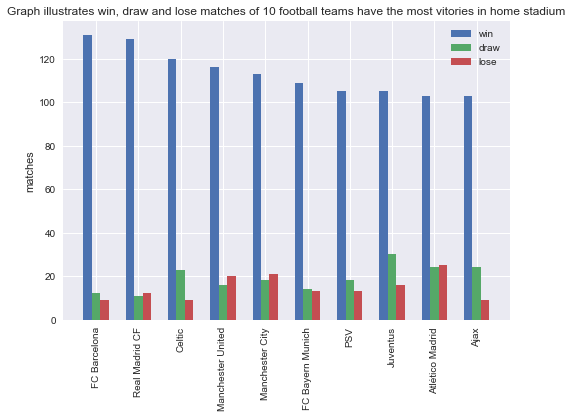

In [260]:
#Count the number of win, draw and lose match of home team
num_win, num_draw, num_lose, teams = [],[],[],[]
for id in x['home_team_api_id'].value_counts().keys()[:10]:
    num_win.append(len(df_match[(df_match['home_team_api_id'] == id) & (df_match['result'] == 'win')]))
    num_draw.append(len(df_match[(df_match['home_team_api_id'] == id) & (df_match['result'] == 'draw')]))
    num_lose.append(len(df_match[(df_match['home_team_api_id'] == id) & (df_match['result'] == 'lose')]))
    teams.append(df_team[df_team['team_api_id'] == id]['team_long_name'].values[0])
    
#Plot bar chart illustrate win, draw and lose matches of 10 football teams have the most vitories in home stadium
X_axis = np.arange(len(teams))

plt.bar(X_axis - 0.2, num_win, 0.2, label = 'win')
plt.bar(X_axis, num_draw, 0.2, label = 'draw')
plt.bar(X_axis + 0.2, num_lose, 0.2, label = 'lose')
plt.ticklabel_format(style='plain',axis='y')

plt.xticks(X_axis, teams, rotation=90)
plt.ylabel('matches')
plt.title('Graph illustrates win, draw and lose matches of 10 football teams have the most vitories in home stadium')
plt.legend();